# Clustering ML Modelling Project



### Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.



### Business Objective



The business wants to categorize the countries using some socio-economic and health factors that determine the overall development of the country. We need to suggest CEO the countries which are in the direst need of financial aid



#### Broadly, following are the steps performed in this project:

1. Understanding the Data - EDA & Data Visualization
    - Outlier Analysis & Treatment
2. Hopkin's Test (Checking the Clustering Tendancy)
4. Scaling
5. Determine the best value of K : SSD & Silhoutte Analysis
6. Final K-Means Analysis with K=3
7. Cluster Visualization using Scatter plots
8. Cluster Profiling
    - Identifying the top Countries (with direst need of financial aid)
9. Hierarchical Clustering
	- Cluster Profiling
	- Identifying the top Countries (with direst need of financial aid)



In [1]:
# Ignore any runtime warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all the required libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scaling package
from sklearn.preprocessing import StandardScaler

# KMeans Clustering library
from sklearn.cluster import KMeans

# Hierarchial Clustering libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [3]:
# loading & understanding the data at a high level
countries = pd.read_csv("country-data.csv")
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
countries.shape

(167, 10)

In [5]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
countries['country'].value_counts(sort=True, ascending=False)

Cote d'Ivoire          1
Georgia                1
Denmark                1
Belgium                1
Guinea-Bissau          1
                      ..
Lesotho                1
Bahamas                1
Antigua and Barbuda    1
Montenegro             1
Comoros                1
Name: country, Length: 167, dtype: int64

We see that there are no missing values & the data types are all correct for each of the columns, we can now proceed with converting the relative values to their absolute values for the 3 columns -> exports, imports & health

In [7]:
# Convert exports, imports and health spending percentages to their absolute values
countries['exports'] = countries['exports']*countries['gdpp']/100
countries['imports'] = countries['imports']*countries['gdpp']/100
countries['health'] = countries['health']*countries['gdpp']/100

In [8]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## EDA - Univariate & Bivariate Analysis

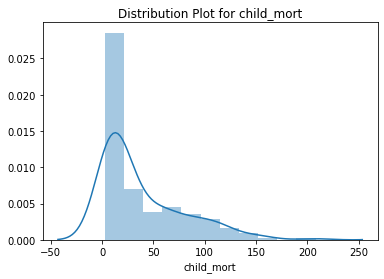

-------------------------------------------------


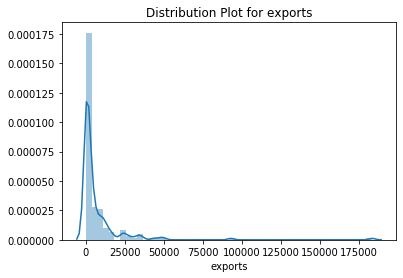

-------------------------------------------------


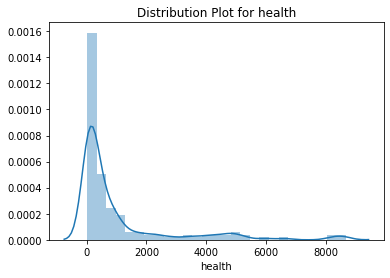

-------------------------------------------------


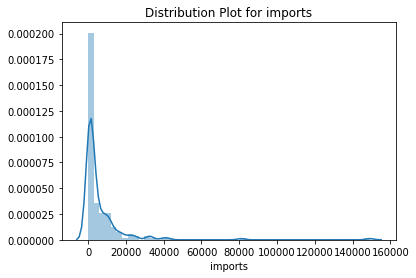

-------------------------------------------------


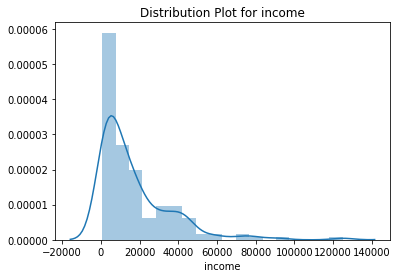

-------------------------------------------------


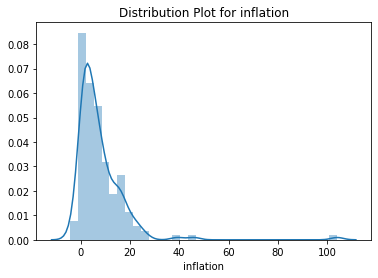

-------------------------------------------------


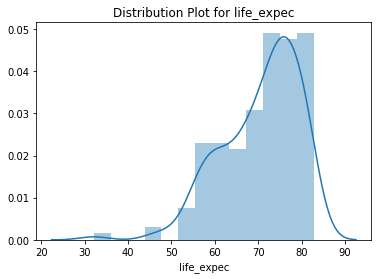

-------------------------------------------------


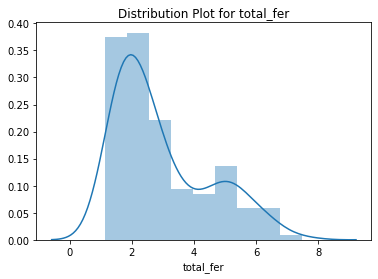

-------------------------------------------------


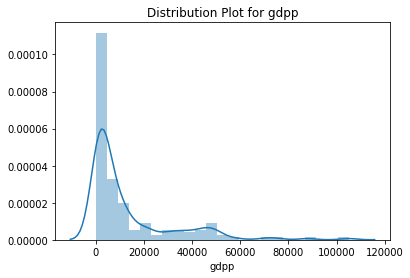

-------------------------------------------------


In [10]:
#[Univariate Analysis] Plotting distplot of numeric variables
cols = list(countries.columns)
num_cols = cols[1:]   #selecting only the numeric columns

for i in num_cols:
    sns.distplot(countries[i])
    plt.title("Distribution Plot for "+i)
    plt.show()
    print("-------------------------------------------------")

**INSIGHTS:**
1. Except for `life_expec`(which is left-skewed distributed), rest all the features are right-skewed distributed.
2. The distribution of `income`, `gdpp` & `child_mort` is very much similar which indicates a sign of having internal grouping. Therefore, these three features would be more useful for us to do the Cluster Profiling.

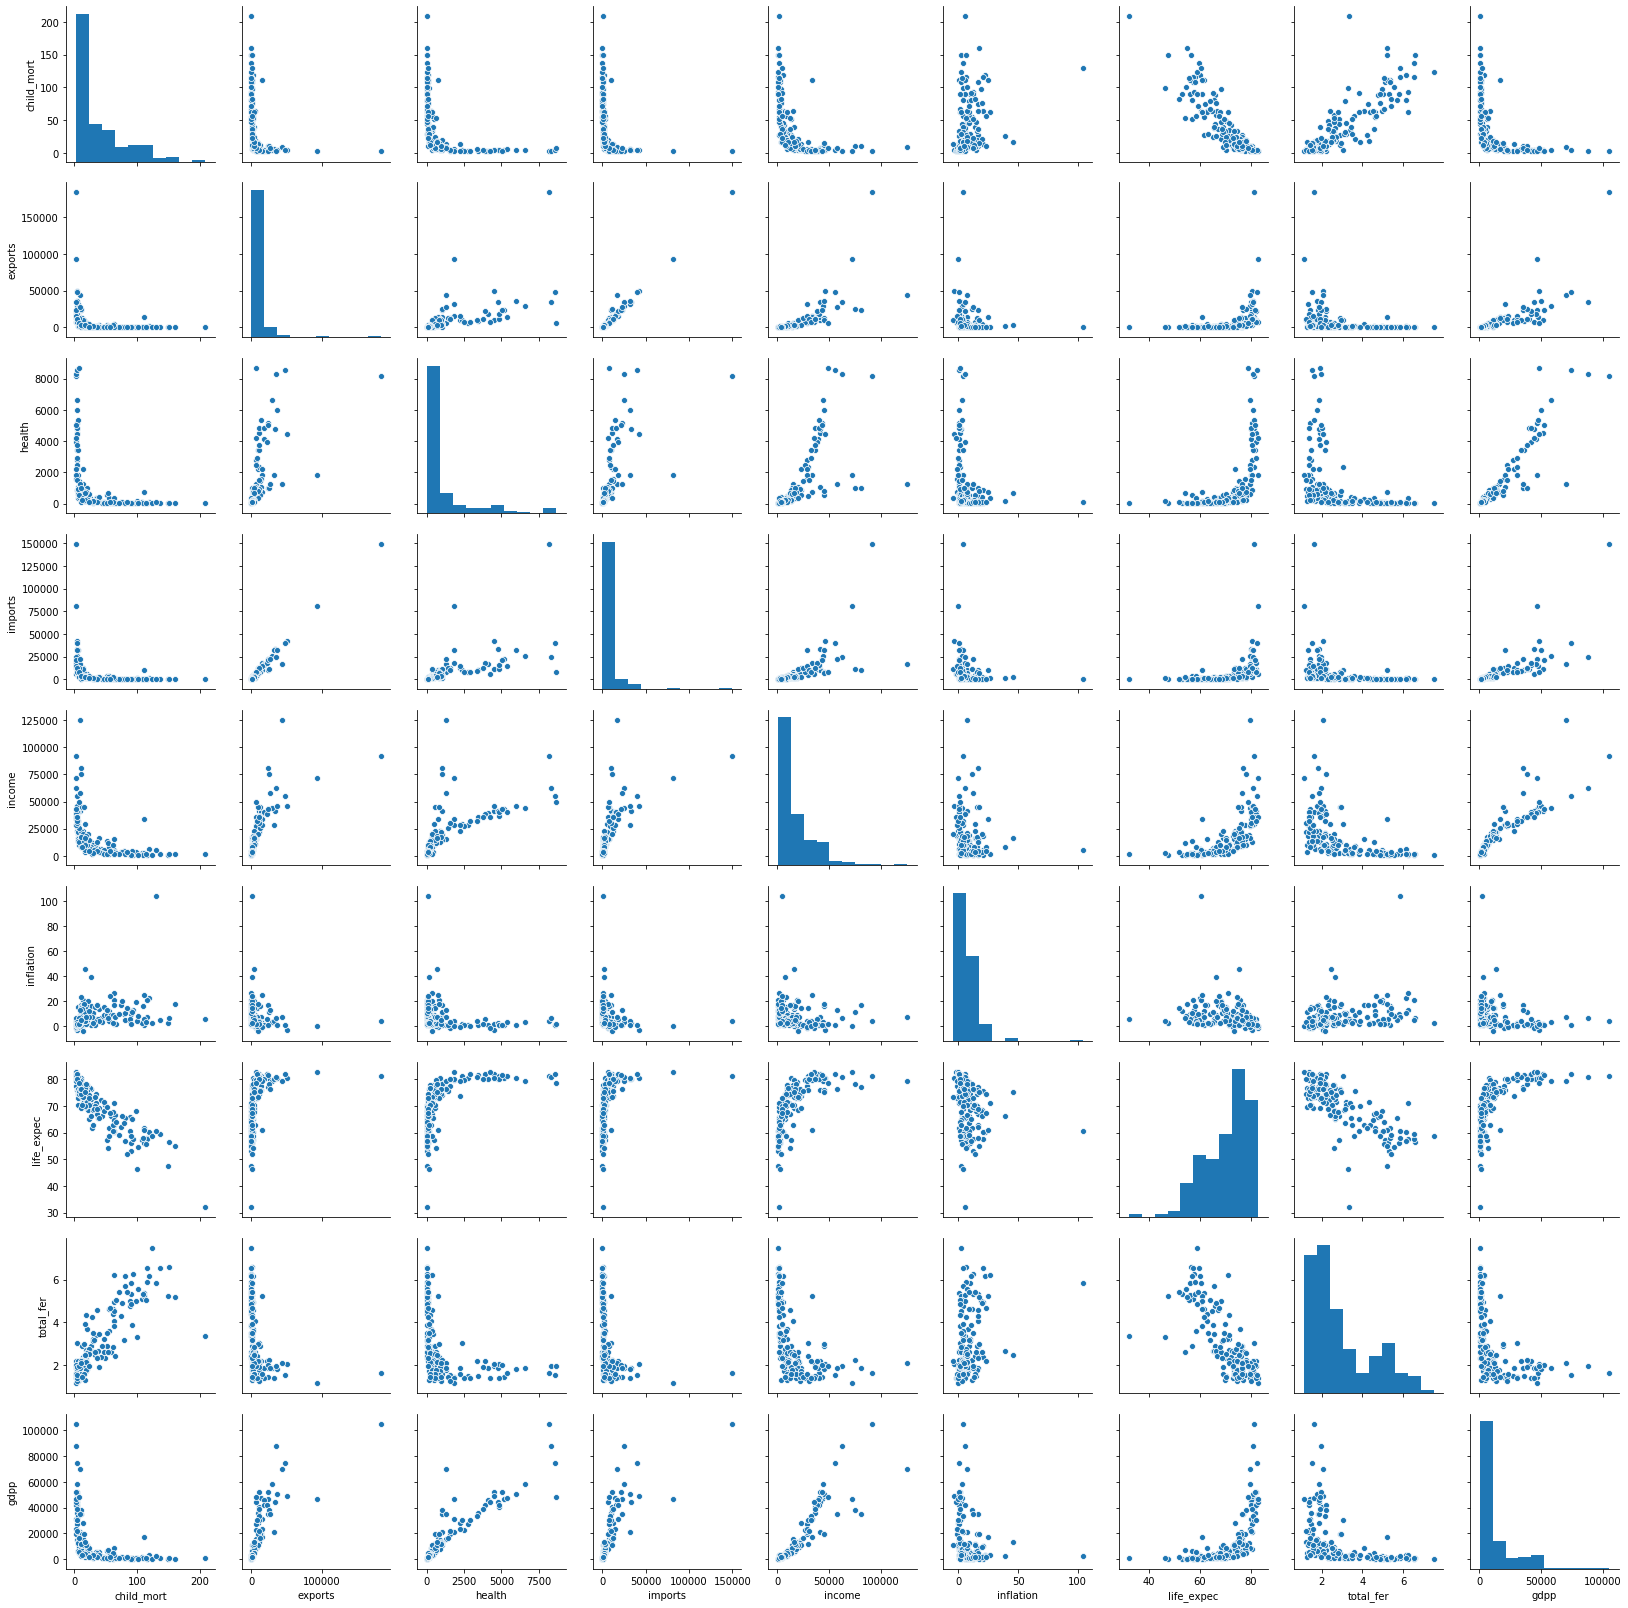

In [11]:
#[Bivariate Analysis] Plotting Pairplot of numeric variables 
sns.pairplot(countries[num_cols])
plt.show()

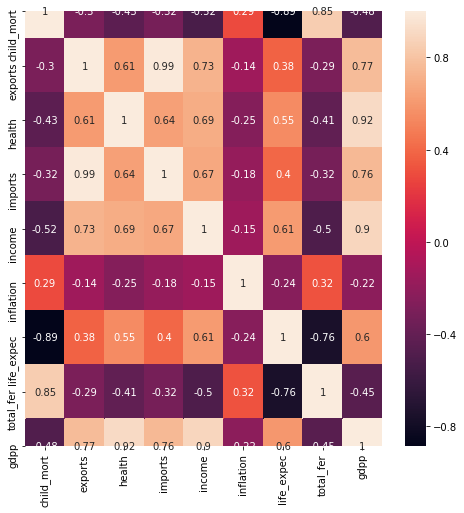

In [12]:
#Building the heatmap of correlation between the numeric variables
plt.figure(figsize=(8,8))
sns.heatmap(countries[num_cols].corr(), annot=True);

**INSIGHTS** *(Pair plot & Correlation Matrix)*:   
1. From the Pair plot & Correlation Matrix, it can be observed that the below feature pairs have a high positive linear correlation:
    - `gdpp` & `income`
    - `gdpp` & `health`
    - `child_mort` & `total_fer`
    - `exports` & `imports`
2. `child_mort` & `life_expec` have a high negative correlation which is quite expected here.

## Outlier Analysis & Treatment

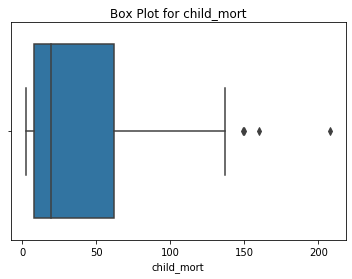

-------------------------------------------------


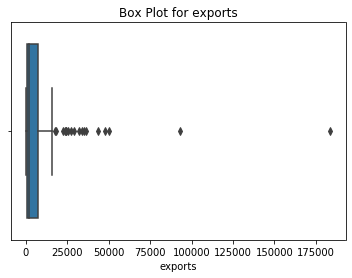

-------------------------------------------------


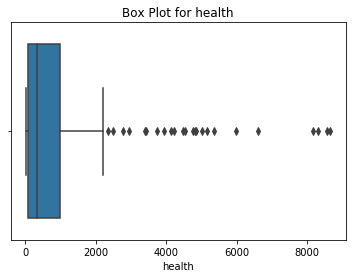

-------------------------------------------------


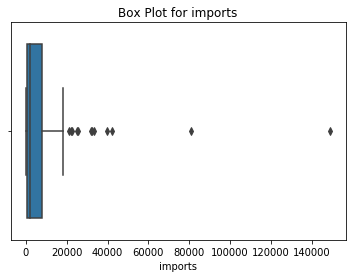

-------------------------------------------------


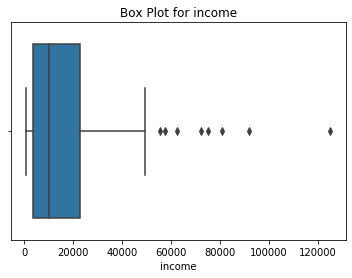

-------------------------------------------------


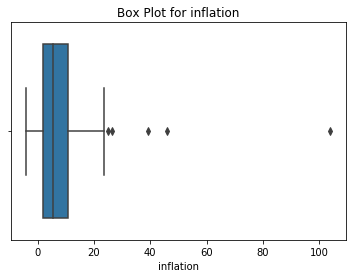

-------------------------------------------------


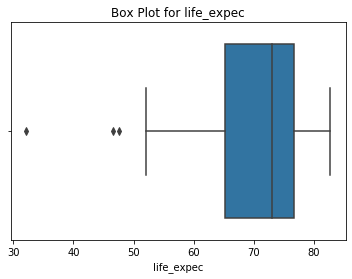

-------------------------------------------------


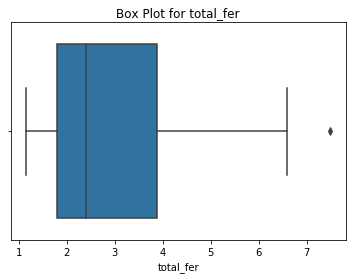

-------------------------------------------------


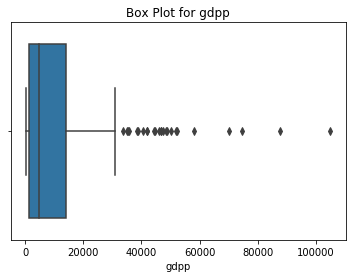

-------------------------------------------------


In [13]:
#Bulding the box plot of the numeric variables
for j in num_cols:
    sns.boxplot(countries[j])
    plt.title("Box Plot for "+j)
    plt.show()
    print("-------------------------------------------------")

**INSIGHTS & Next Steps:**
1. From the Box plot it can be observed that except for `life_expec`(have outliers present at the lower end), all the other features have outliers present at the higher end.
2. As we know the business objective here is to identify the countries which are in the direst need of financial aid, therefore, we can perform capping of the outliers countries (from each of the features) which represents financially stable countries. This way we will not be disturbing any data points which are the representative of poor countries.
3. Therefore, here we will perform the soft capping of the upper range outliers of the below features:
    - `exports`; `health`; `imports`; `income` & `gdpp`

In [14]:
# Outliers Treatment:
# Performing soft capping(0.99) of upper range outliers of -> exports; health; imports; income & gdpp

q1 = countries['exports'].quantile(0.99)
q2 = countries['health'].quantile(0.99)
q3 = countries['imports'].quantile(0.99)
q4 = countries['income'].quantile(0.99)
q5 = countries['gdpp'].quantile(0.99)

print('q1:{0}\nq2:{1}\nq3:{2}\nq4:{3}\nq5:{4}'.format(q1,q2,q3,q4,q5))

q1:64794.26000000014
q2:8410.3304
q3:55371.39000000013
q4:84374.00000000003
q5:79088.00000000004


In [15]:
countries['exports'][countries['exports']>=q1] = q1
countries['health'][countries['health']>=q2] = q2
countries['imports'][countries['imports']>=q3] = q3
countries['income'][countries['income']>=q4] = q4
countries['gdpp'][countries['gdpp']>=q5] = q5

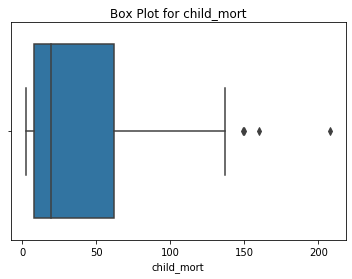

-------------------------------------------------


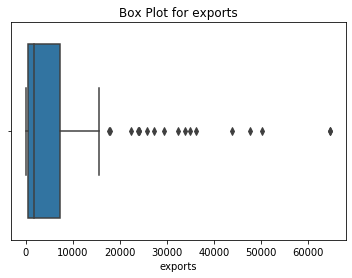

-------------------------------------------------


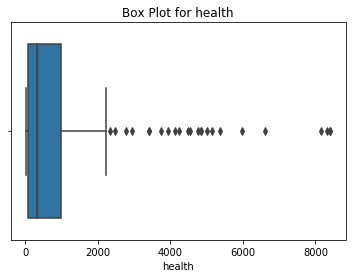

-------------------------------------------------


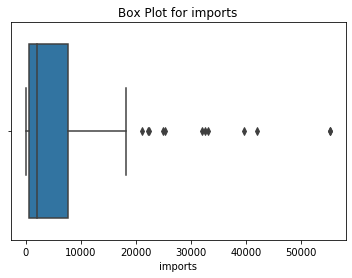

-------------------------------------------------


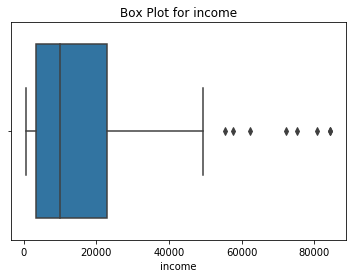

-------------------------------------------------


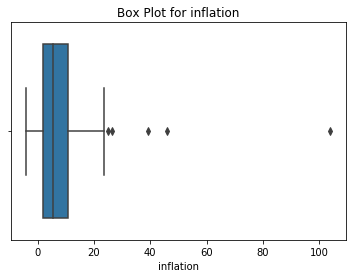

-------------------------------------------------


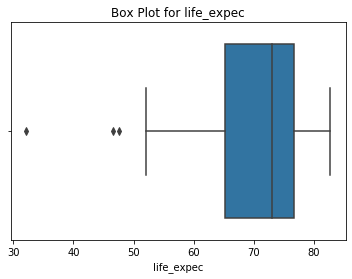

-------------------------------------------------


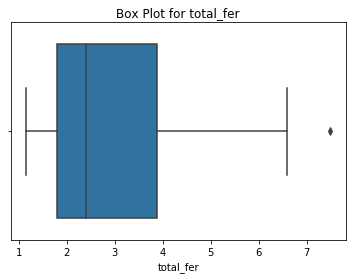

-------------------------------------------------


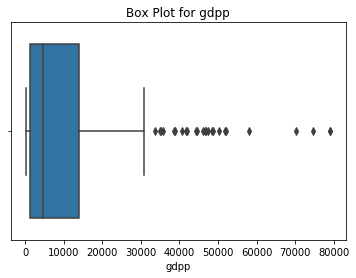

-------------------------------------------------


In [16]:
#Bulding the box plot again after soft capping
for j in num_cols:
    sns.boxplot(countries[j])
    plt.title("Box Plot for "+j)
    plt.show()
    print("-------------------------------------------------")

From the above box plots, we can see that the outliers are still there even after performing the capping. However, since the volume of records in the dataset is very less, we will not perform any further capping in order to maintain the originality of feature distribution to a greater extent possible.

Let's now move towards checking the Clustering Tendency of the dataset through Hopkin's Test

## Hopkin's Test (Checking the Clustering Tendancy)

In [17]:
## Performig the Hopkin's Statistics Test
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [18]:
# Hopkin's Test - How different our data is from randomly scattered data
#Performing this test multiple times to analyse the results & take necessary actions 

hk_countries = countries.drop('country', axis=1) # dropping the non-numerical column

for i in range(15):
    print(hopkins(hk_countries))

0.8672934497618968
0.9738598119293187
0.9706632124177682
0.9069819071003107
0.9301769828870721
0.861085479898138
0.9295506225425444
0.9299190844129241
0.9267473826670865
0.8993181555121386
0.9167396435903359
0.7846210367631568
0.9410201117191381
0.898406443757898
0.9108226586379594


**Insights:**
- So, from the above Hopkin's Test, we can see that the average score has come out to be around 90% which is an excellent indicator of higher clustering tendency of our dataset. 
- In other words, the above test also represents that our dataset is 90% different from the randomly scattered data. The higher the value of dissimilarity, the more apt is our data for clustering.

## Scaling

In [19]:
# Performing Standard Scaling of the numerical variables 
countries_num = countries.drop('country', axis=1) # dropping the non-numerical column
cols = countries_num.columns

# instantiate
scaler = StandardScaler()

# fit_transform
countries_scaled = scaler.fit_transform(countries_num)
countries_scaled.shape

(167, 9)

In [20]:
#After Scaling
countries_scaled

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [21]:
#Converting numpy array to a dataframe
countries_scaled = pd.DataFrame(countries_scaled)
countries_scaled.columns = cols
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


## Determine the best value of K : SSD & Silhoutte Analysis

In [22]:
# Getting the Silhoutte Scores
from sklearn.metrics import silhouette_score

sil = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_scaled)
    sil.append([k, silhouette_score(countries_scaled, kmean.labels_)])
    
sil

[[2, 0.4785840154547688],
 [3, 0.4225082959293209],
 [4, 0.4083536290370275],
 [5, 0.41481239240919177],
 [6, 0.3158051449254877],
 [7, 0.32070998930402145],
 [8, 0.2639845587210871],
 [9, 0.3168325972122222],
 [10, 0.3053770399142593]]

In [23]:
sil = pd.DataFrame(sil)
sil

,0,1
0,2,0.478584
1,3,0.422508
2,4,0.408354
3,5,0.414812
4,6,0.315805
5,7,0.320710
6,8,0.263985
7,9,0.316833
8,10,0.305377


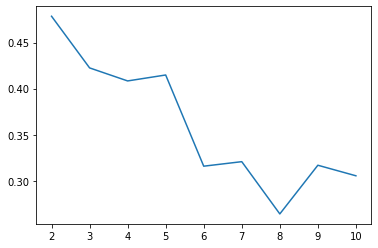

In [24]:
#Plotting the Silhoutte Scores for different values of k
plt.plot(sil[0], sil[1]);

From the above Silhouette score analysis, we can see that the maximum score (after k=2, since k=2 is never a good number for clustering) is obtained for **k=3**.

In [25]:
# SSD/Elbow Analysis

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_scaled)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 851.7336991398658],
 [3, 561.643633976162],
 [4, 449.8551457364226],
 [5, 401.2757669852566],
 [6, 327.07299070090477],
 [7, 297.7082597297475],
 [8, 270.00397502955565],
 [9, 239.987853857117],
 [10, 223.15409327999694]]

In [26]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,851.733699
1,3,561.643634
2,4,449.855146
3,5,401.275767
4,6,327.072991
5,7,297.708260
6,8,270.003975
7,9,239.987854
8,10,223.154093


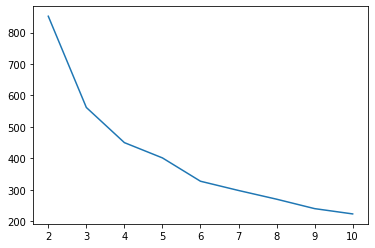

In [27]:
# Plotting the Elbow curve for different values of k
plt.plot(ssd[0], ssd[1]);

From the above SSD analysis, we can see that the slope of the line (after k=2, since k=2 is never a good number for clustering) has a maximum delta/change at **k=3**.

Therefore, from the above two analysis(SSD & silhouette), we can conclude that the **best value of k has to be 3**

## Final K-Means Analysis with K=3

In [28]:
#Performing the K-Means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(countries_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [29]:
# Centroids co-ordinates
kmeans.cluster_centers_

array([[ 1.32661038, -0.49724204, -0.52612588, -0.53713716, -0.72390519,
         0.39181237, -1.27627565,  1.3543418 , -0.62421756],
       [-0.44998219, -0.25376753, -0.26941915, -0.22498284, -0.15014629,
        -0.0746178 ,  0.33795561, -0.47857149, -0.26067276],
       [-0.82514582,  1.74867521,  1.85335572,  1.7215187 ,  1.79855215,
        -0.44230208,  1.11738206, -0.77703072,  1.99793841]])

In [30]:
# Cluster Labels
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [31]:
# Assigning the cluster labels to our original dataset
countries['cluster_labels'] = kmeans.labels_

In [32]:
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [33]:
# checking the count of countries in each of the 3 clusters
countries['cluster_labels'].value_counts()

1    92
0    48
2    27
Name: cluster_labels, dtype: int64

## Cluster Visualization using Scatter plots

Here, we will visualize the clusters using the scatter plot with respect to the below features (in pairs):  
- `gdpp`
- `child_mort`
- `income`

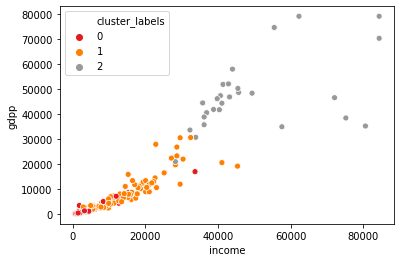

In [34]:
#Scatter Plot for 'income' vs. 'gdpp'
sns.scatterplot(x='income', y='gdpp', hue='cluster_labels', data=countries, palette='Set1');

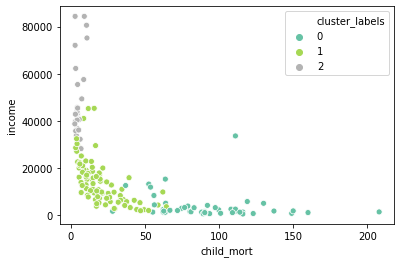

In [35]:
#Scatter Plot for 'income' vs. 'child_mort'
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels', data=countries, palette='Set2');

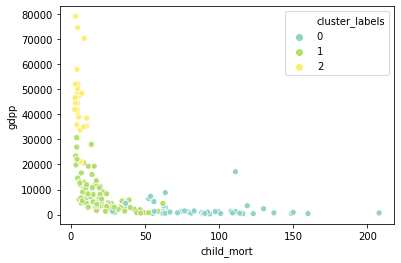

In [36]:
#Scatter Plot for 'gdpp' vs. 'child_mort'
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels', data=countries, palette='Set3');

From the above scatter plots, the 3 clusters are neat & visible to us. We can also clearly identify the groups of countries based on the level of their financial stability. With that in mind, let's proceed & analyze further in Cluster Profiling.

## Cluster Profiling

Here, we will perform the cluster profiling with respect to the below features:  
- `gdpp`
- `child_mort`
- `income`

Our objective here is to identify that cluster of countries which are in direst need of financial aid. That is the countries with -> LOW GDPP, LOW Income & HIGH Child Mortality.

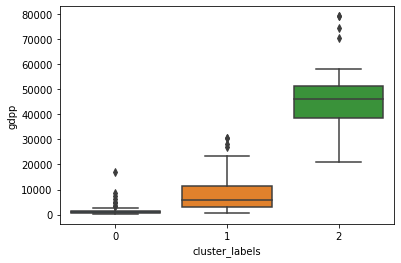

In [37]:
# Cluster profiling using Box plots

# Box plot for 'gdpp'
sns.boxplot(x='cluster_labels', y='gdpp', data=countries)
plt.show()

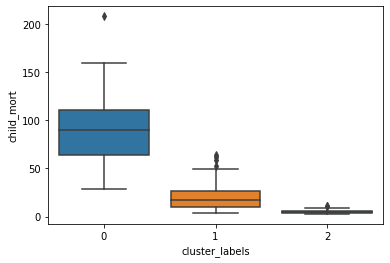

In [38]:
# Box plot for 'child_mort'
sns.boxplot(x='cluster_labels', y='child_mort', data=countries)
plt.show()

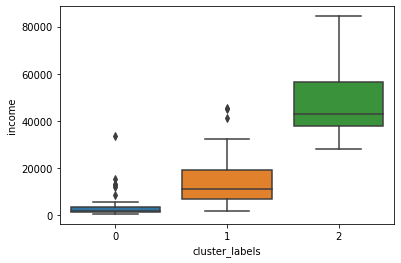

In [39]:
# Box plot for 'income'
sns.boxplot(x='cluster_labels', y='income', data=countries)
plt.show()

**INSIGHTS**:  
From the above box plots, it is clearly evident that our target cluster is the one with **cluster_labels=0**. This cluster represents the poor countries with LOW GDPP, LOW Income & HIGH Child Mortality.

### Identifying the top Countries (with direst need of financial aid)

In [40]:
# Selecting the cluster with cluster_labels==0
poor_countries = countries[countries['cluster_labels']==0]
poor_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [41]:
# Sorting in the given order(gdpp, child_mort and income) to get the poorest list of countries
poor_countries.sort_values(['gdpp','child_mort','income'], ascending=[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0


**So, from the above sorted table, the list of 5 countries with direst need of financial aid is:**  
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

## Hierarchical Clustering

Let's perform the Hierarchical Clustering through the below two linkage methods:
- Single Linkage
- Complete Linkage

In [42]:
countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


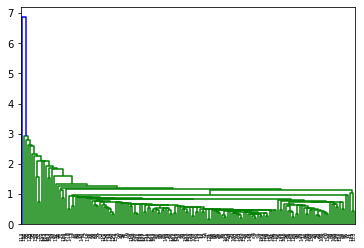

In [43]:
# single linkage
mergings = linkage(countries_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

The above dendrogram is not clear to make any cut for clustering. Hence, we will go with dendrogram with complete linkage. 

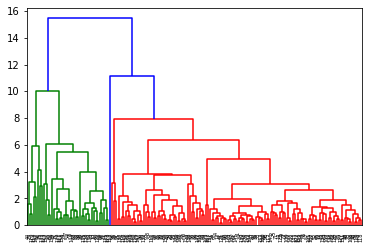

In [44]:
# complete linkage
mergings = linkage(countries_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Here, from the above dendrogram(with complete linkage) we can either cut it at k=3 or at k=4.   
Let's go with k=4 here so that we can compare our results with that of K-means clustering outcomes.

In [45]:
# Perform clustering with k=4
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [46]:
# Assigning cluster labels
countries['H_cluster_labels'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,H_cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [47]:
# checking the count of countries in each of the 3 clusters
countries['H_cluster_labels'].value_counts()

0    125
1     33
2      8
3      1
Name: H_cluster_labels, dtype: int64

Here, we can ignore the last cluster with H_cluster_labels=3 as it only has one record

### Cluster Profiling
**(Hierarchical Clustering)**

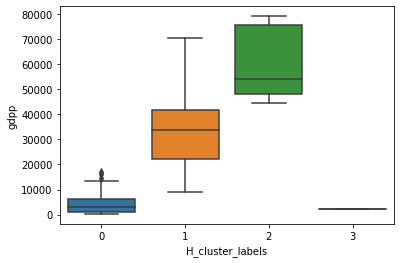

In [48]:
# Cluster profiling using Box plots

# Box plot for 'gdpp'
sns.boxplot(x='H_cluster_labels', y='gdpp', data=countries)
plt.show()

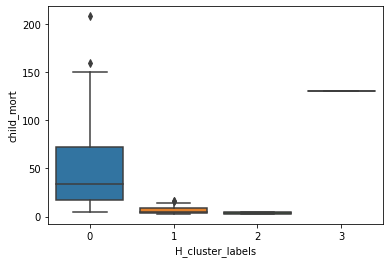

In [49]:
# Box plot for 'child_mort'
sns.boxplot(x='H_cluster_labels', y='child_mort', data=countries)
plt.show()

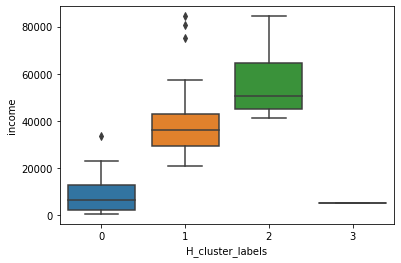

In [50]:
# Box plot for 'income'
sns.boxplot(x='H_cluster_labels', y='income', data=countries)
plt.show()

**INSIGHTS**:  
From the above box plots, it is clearly evident that our target cluster is the one with **H_cluster_labels=0**. This cluster represents the poor countries with LOW GDPP, LOW Income & HIGH Child Mortality.

### Identifying the top Countries (with direst need of financial aid)
**(Hierarchical Clustering)**

In [51]:
# Selecting the cluster with cluster_labels==0
poor_countries_H = countries[countries['H_cluster_labels']==0]
poor_countries_H.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,H_cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


In [52]:
# Sorting in the given order(gdpp, child_mort and income) to get the poorest list of countries
poor_countries_H.sort_values(['gdpp','child_mort','income'], ascending=[True,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,H_cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0,0


**So, from the above sorted table, the list of 5 countries with direst need of financial aid is:**  
- Burundi
- Liberia
- Congo, Dem. Rep.
- Niger
- Sierra Leone

**So finally, we have observed that from both K-Means & Hierarchical Clustering, although the process & clusters formed were different but the end-result obtained(the list of countries with the direst need of financial aid) is the same.**

## Thank You!
                                                                      Assignment Submitted by: Abhinav Choudhary [PGDDS C24]